In [12]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Lists for holding all the data
real_text = []
fake_text = []

# Load all files from the dataset directory
path_to_json_real = './dataset/real_news/'
path_to_json_fake = './dataset/fake_news/'

real_json_files = [json_file for json_file in os.listdir(path_to_json_real) if json_file.endswith('.json')]
fake_json_files = [json_file for json_file in os.listdir(path_to_json_fake) if json_file.endswith('.json')]

for real_json_file in real_json_files:
    open_json = open(os.path.join(path_to_json_real, real_json_file))
    real_text.append(json.load(open_json))

for fake_json_file in fake_json_files:
    open_json = open(os.path.join(path_to_json_fake, fake_json_file))
    fake_text.append(json.load(open_json))

pd_real = pd.DataFrame.from_dict(real_text)
pd_fake = pd.DataFrame.from_dict(fake_text)



# Simple Analysis

* Analysis based on the number of likes, reposts and comments, without using natural language processing

1. Analyse real and fake news separately.

2. Get maximum, minimum, average, median for each of the parameters.

3. Plot each of the parameters.

Statistics about likes of real news
Mean: 32049.778409090908  Standard Deviation: 85879.22762397358
Maximum: 1179103  Minimum: 636  Median: 8750.0 

Statistics about likes of fake news
Mean: 1293.9418604651162  Standard Deviation: 9953.240984803202
Maximum: 145108  Minimum: 0  Median: 16.5 



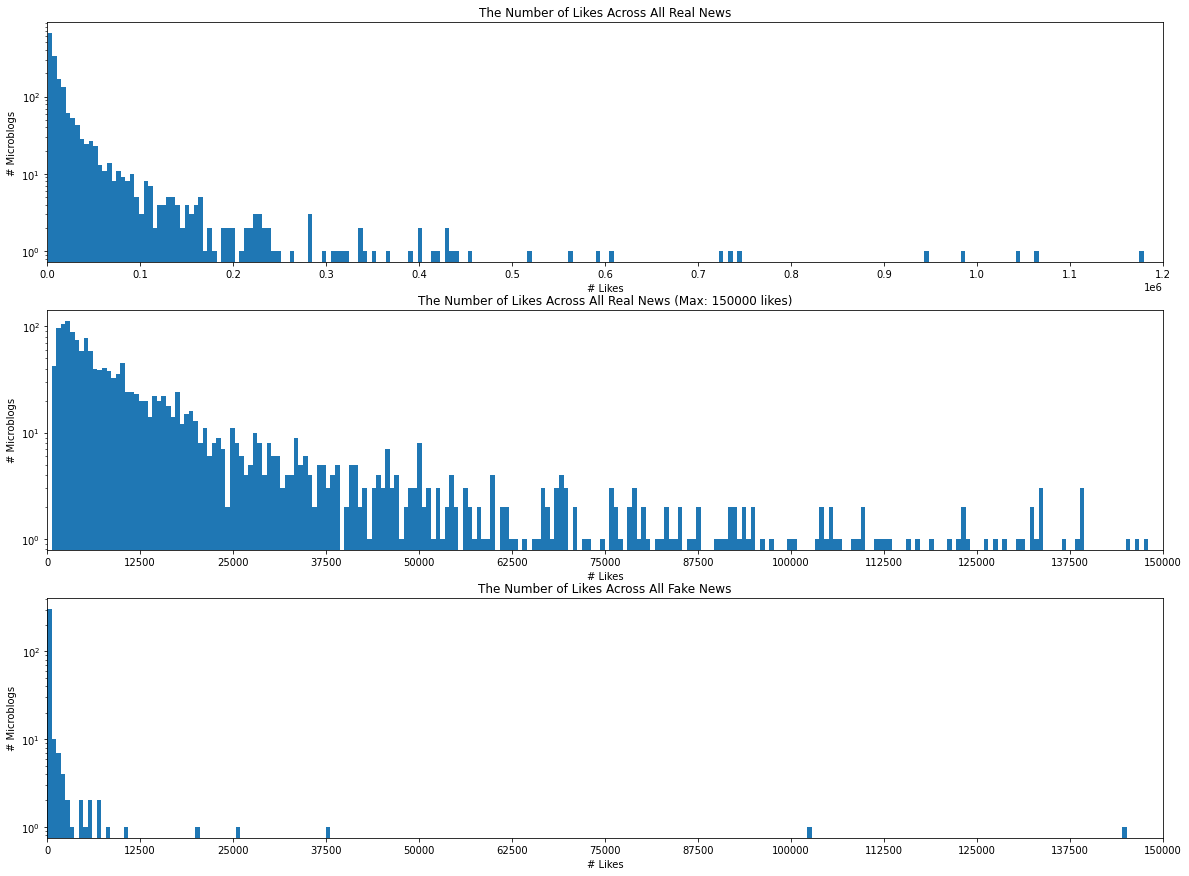

The number of fake news without likes is: 36
This accounts for 10.465116279069768 % of all fake news.

The number of fake news with fewer likes than the minimum likes of real news (636 likes) is 307
This accounts for 89.24418604651163 % of all fake news.

On average, real news have 24.769102374947817 times more likes than fake news.
On median, real news have 530.3030303030303 times more likes than fake news.



In [13]:
# Analysing number of likes

like_nums = pd_real['like_num'].astype('int')
print ("Statistics about likes of real news")
print ("Mean:", str(like_nums.mean()), " Standard Deviation:", str(like_nums.std()))
print ("Maximum:", str(like_nums.max()), " Minimum:", str(like_nums.min()), " Median:", str(like_nums.median()), "\n")


fake_like_nums = pd_fake['like_num'].astype('int')
print ("Statistics about likes of fake news")
print ("Mean:", str(fake_like_nums.mean()), " Standard Deviation:", str(fake_like_nums.std()))
print ("Maximum:", str(fake_like_nums.max()), " Minimum:", str(fake_like_nums.min()), " Median:", str(fake_like_nums.median()), "\n")


plt.figure(figsize=(20, 15))

# Plot real news
plt.subplot(3,1,1)
plt.hist(like_nums, bins=240)
plt.xlabel('# Likes')
plt.ylabel('# Microblogs')
plt.xlim([0, 1200000])
plt.xticks(np.linspace(0, 1200000, num=13))
plt.yscale('log')
plt.title("The Number of Likes Across All Real News")

# Plot real news in the range of likes of fake news
plt.subplot(3,1,2)
plt.hist(like_nums[like_nums<=150000], bins=240)
plt.xlabel('# Likes')
plt.ylabel('# Microblogs')
plt.xlim([0, 150000])
plt.xticks(np.linspace(0, 150000, num=13))
plt.yscale('log')
plt.title("The Number of Likes Across All Real News (Max: 150000 likes)")

# Plot fake news
plt.subplot(3,1,3)
plt.hist(fake_like_nums, bins=240)
plt.xlabel('# Likes')
plt.ylabel('# Microblogs')
plt.xlim([0, 150000])
plt.xticks(np.linspace(0, 150000, num=13))
plt.yscale('log')
plt.title("The Number of Likes Across All Fake News")

plt.show()


# Some facts about fake news
print ("The number of fake news without likes is:", str(len(fake_like_nums[fake_like_nums==0])))
print ("This accounts for", str(len(fake_like_nums[fake_like_nums==0]) / len(fake_like_nums) * 100), "% of all fake news.\n")

print ("The number of fake news with fewer likes than the minimum likes of real news (636 likes) is", str(len(fake_like_nums[fake_like_nums<636])))
print ("This accounts for", str(len(fake_like_nums[fake_like_nums<636]) / len(fake_like_nums) * 100), "% of all fake news.\n")

print ("On average, real news have", str(like_nums.mean() / fake_like_nums.mean()), "times more likes than fake news.")
print ("On median, real news have", str(like_nums.median() / fake_like_nums.median()), "times more likes than fake news.\n")



Statistics about comments of real news
Mean: 2122.28125  Standard Deviation: 3810.97161752411
Maximum: 73717  Minimum: 66  Median: 993.5 

Statistics about comments of fake news
Mean: 109.7936046511628  Standard Deviation: 600.9868423534848
Maximum: 7224  Minimum: 0  Median: 10.0 



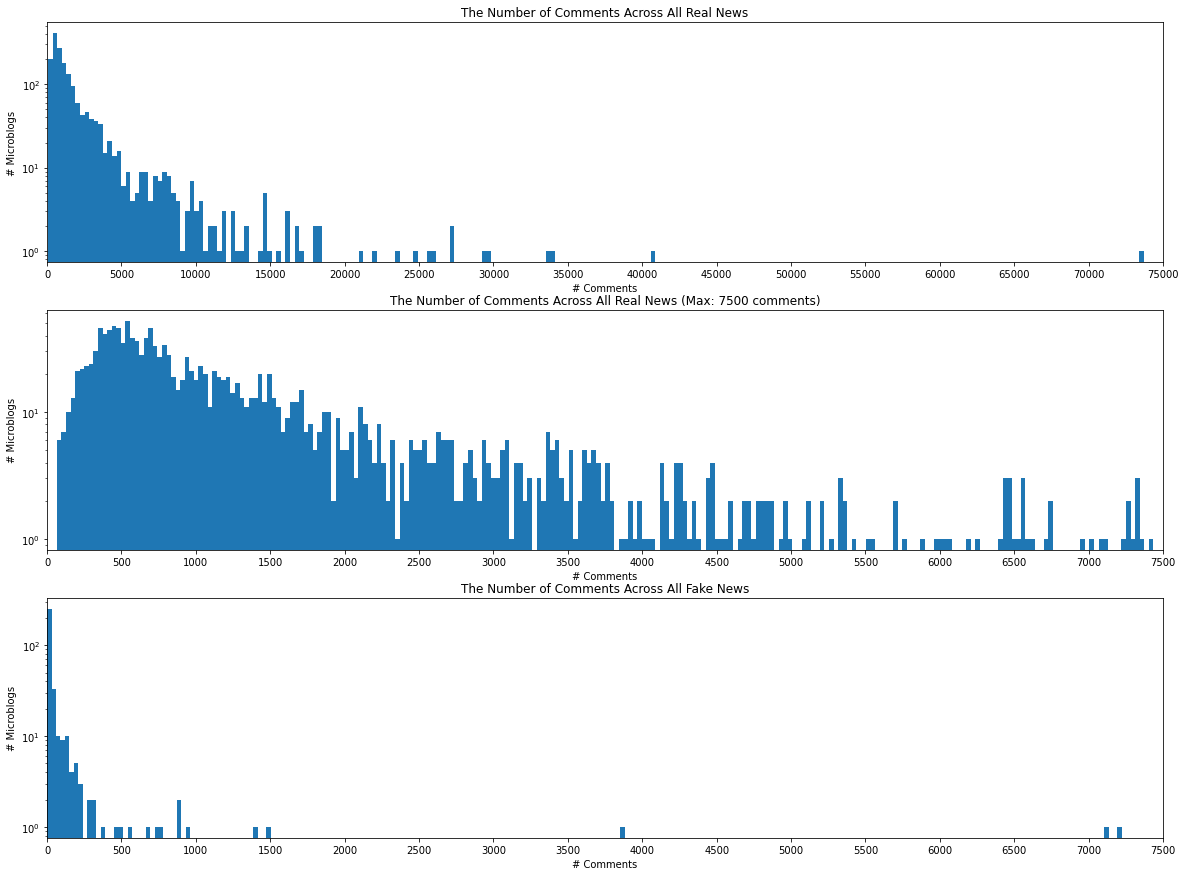

The number of fake news without comments is: 52
This accounts for 15.11627906976744 % of all fake news.

The number of fake news with fewer comments than the minimum comments of real news (66 comments) is 285
This accounts for 82.84883720930233 % of all fake news.

On average, real news have 19.32973470306336 times more comments than fake news.
On median, real news have 99.35 times more comments than fake news.



In [14]:
# Analysing number of comments

comment_nums = pd_real['comment_num'].astype('int')
print ("Statistics about comments of real news")
print ("Mean:", str(comment_nums.mean()), " Standard Deviation:", str(comment_nums.std()))
print ("Maximum:", str(comment_nums.max()), " Minimum:", str(comment_nums.min()), " Median:", str(comment_nums.median()), "\n")


fake_comment_nums = pd_fake['comment_num'].astype('int')
print ("Statistics about comments of fake news")
print ("Mean:", str(fake_comment_nums.mean()), " Standard Deviation:", str(fake_comment_nums.std()))
print ("Maximum:", str(fake_comment_nums.max()), " Minimum:", str(fake_comment_nums.min()), " Median:", str(fake_comment_nums.median()), "\n")




plt.figure(figsize=(20, 15))

# Plot real news
plt.subplot(3,1,1)
plt.hist(comment_nums, bins=240)
plt.xlabel('# Comments')
plt.ylabel('# Microblogs')
plt.xlim([0, 75000])
plt.xticks(np.linspace(0, 75000, num=16))
plt.yscale('log')
plt.title("The Number of Comments Across All Real News")

# Plot real news in the range of comments of fake news
plt.subplot(3,1,2)
plt.hist(comment_nums[comment_nums<=7500], bins=240)
plt.xlabel('# Comments')
plt.ylabel('# Microblogs')
plt.xlim([0, 7500])
plt.xticks(np.linspace(0, 7500, num=16))
plt.yscale('log')
plt.title("The Number of Comments Across All Real News (Max: 7500 comments)")

# Plot fake news
plt.subplot(3,1,3)
plt.hist(fake_comment_nums, bins=240)
plt.xlabel('# Comments')
plt.ylabel('# Microblogs')
plt.xlim([0, 7500])
plt.xticks(np.linspace(0, 7500, num=16))
plt.yscale('log')
plt.title("The Number of Comments Across All Fake News")

plt.show()


# Some facts about fake news
print ("The number of fake news without comments is:", str(len(fake_comment_nums[fake_comment_nums==0])))
print ("This accounts for", str(len(fake_comment_nums[fake_comment_nums==0]) / len(fake_comment_nums) * 100), "% of all fake news.\n")

print ("The number of fake news with fewer comments than the minimum comments of real news (66 comments) is", str(len(fake_comment_nums[fake_comment_nums<66])))
print ("This accounts for", str(len(fake_comment_nums[fake_comment_nums<66]) / len(fake_comment_nums) * 100), "% of all fake news.\n")

print ("On average, real news have", str(comment_nums.mean() / fake_comment_nums.mean()), "times more comments than fake news.")
print ("On median, real news have", str(comment_nums.median() / fake_comment_nums.median()), "times more comments than fake news.\n")


Statistics about reposts of real news
Mean: 4142.440909090909  Standard Deviation: 53283.92636720973
Maximum: 1886915  Minimum: 82  Median: 755.0 

Statistics about comments of fake news
Mean: 162.02325581395348  Standard Deviation: 1625.2574425486048
Maximum: 27199  Minimum: 0  Median: 2.0 



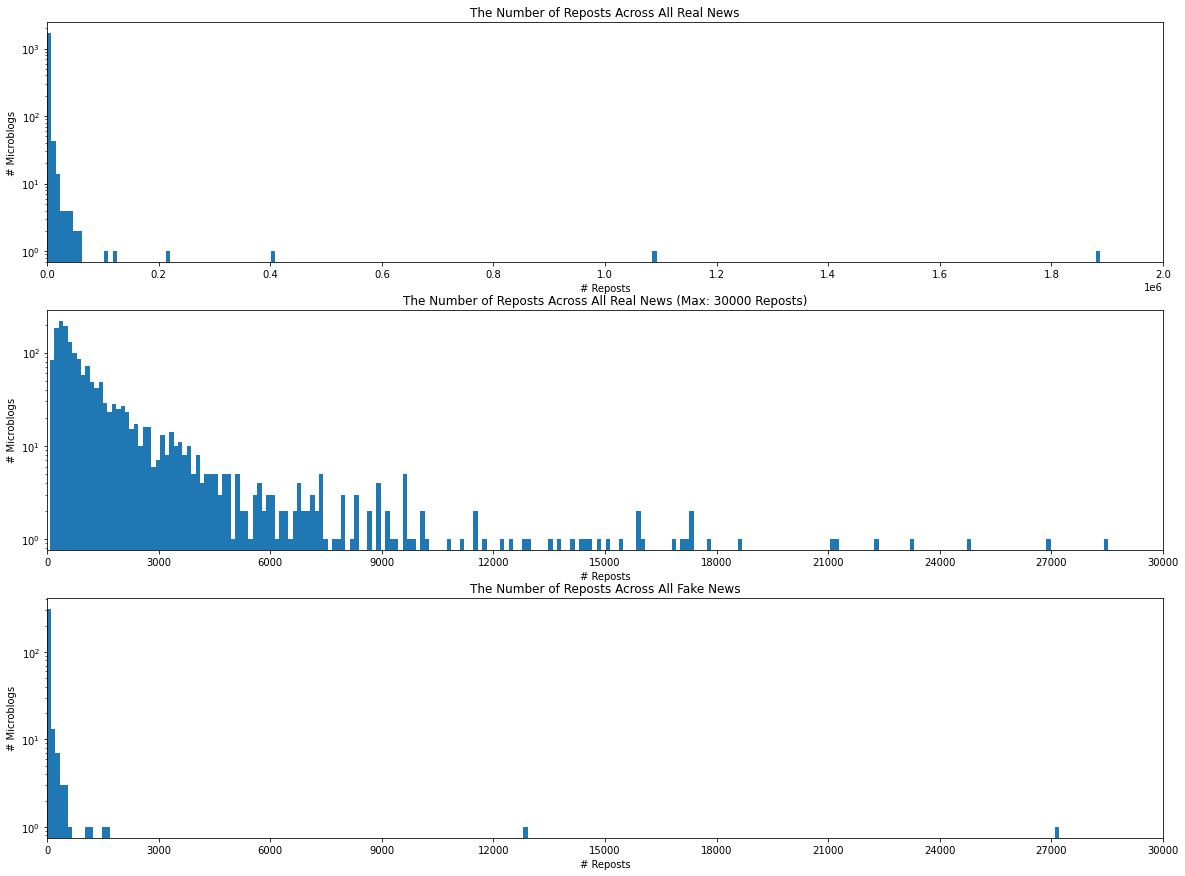

The number of fake news without reposts is: 115
This accounts for 33.43023255813954 % of all fake news.

The number of fake news with fewer reposts than the minimum reposts of real news (82 reposts) is 304
This accounts for 88.37209302325581 % of all fake news.

On average, real news have 25.5669526468938 times more reposts than fake news.
On median, real news have 377.5 times more reposts than fake news.



In [15]:
# Analysing number of reposts

repost_nums = pd_real['repost_num'].astype('int')
print ("Statistics about reposts of real news")
print ("Mean:", str(repost_nums.mean()), " Standard Deviation:", str(repost_nums.std()))
print ("Maximum:", str(repost_nums.max()), " Minimum:", str(repost_nums.min()), " Median:", str(repost_nums.median()), "\n")


fake_repost_nums = pd_fake['repost_num'].astype('int')
print ("Statistics about comments of fake news")
print ("Mean:", str(fake_repost_nums.mean()), " Standard Deviation:", str(fake_repost_nums.std()))
print ("Maximum:", str(fake_repost_nums.max()), " Minimum:", str(fake_repost_nums.min()), " Median:", str(fake_repost_nums.median()), "\n")




plt.figure(figsize=(20, 15))

# Plot real news
plt.subplot(3,1,1)
plt.hist(repost_nums, bins=240)
plt.xlabel('# Reposts')
plt.ylabel('# Microblogs')
plt.xlim([0, 2000000])
plt.xticks(np.linspace(0, 2000000, num=11))
plt.yscale('log')
plt.title("The Number of Reposts Across All Real News")

# Plot real news in the range of comments of fake news
plt.subplot(3,1,2)
plt.hist(repost_nums[repost_nums<=30000], bins=240)
plt.xlabel('# Reposts')
plt.ylabel('# Microblogs')
plt.xlim([0, 30000])
plt.xticks(np.linspace(0, 30000, num=11))
plt.yscale('log')
plt.title("The Number of Reposts Across All Real News (Max: 30000 Reposts)")

# Plot fake news
plt.subplot(3,1,3)
plt.hist(fake_repost_nums, bins=240)
plt.xlabel('# Reposts')
plt.ylabel('# Microblogs')
plt.xlim([0, 30000])
plt.xticks(np.linspace(0, 30000, num=11))
plt.yscale('log')
plt.title("The Number of Reposts Across All Fake News")

plt.show()


# Some facts about fake news
print ("The number of fake news without reposts is:", str(len(fake_repost_nums[fake_repost_nums==0])))
print ("This accounts for", str(len(fake_repost_nums[fake_repost_nums==0]) / len(fake_repost_nums) * 100), "% of all fake news.\n")

print ("The number of fake news with fewer reposts than the minimum reposts of real news (82 reposts) is", str(len(fake_repost_nums[fake_repost_nums<82])))
print ("This accounts for", str(len(fake_repost_nums[fake_repost_nums<82]) / len(fake_repost_nums) * 100), "% of all fake news.\n")

print ("On average, real news have", str(repost_nums.mean() / fake_repost_nums.mean()), "times more reposts than fake news.")
print ("On median, real news have", str(repost_nums.median() / fake_repost_nums.median()), "times more reposts than fake news.\n")

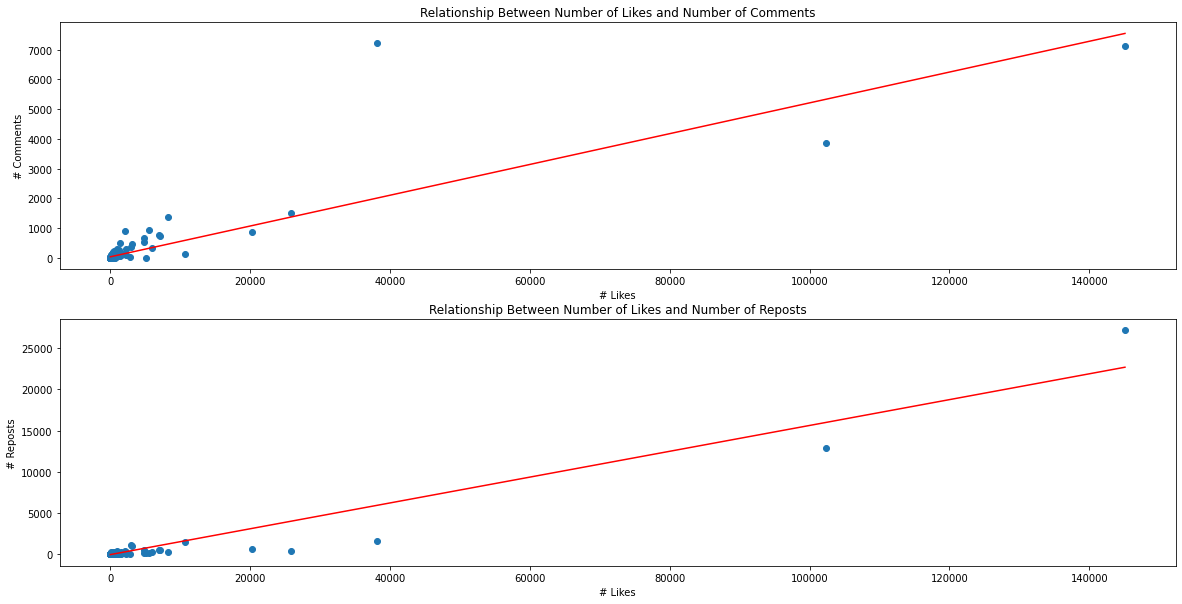

In [16]:
# Plot the relationship between likes and comments/reposts
fake_comments = pd_fake[['like_num','comment_num','repost_num']].astype('int')
fake_comments = fake_comments.sort_values('like_num')


plt.figure(figsize=(20, 10))

plt.subplot(2,1,1)
plt.scatter(fake_comments['like_num'], fake_comments['comment_num'])
plt.xlabel('# Likes')
plt.ylabel('# Comments')

m, b = np.polyfit(fake_comments['like_num'], fake_comments['comment_num'], 1)
plt.plot(fake_comments['like_num'], m*fake_comments['like_num']+b, color='red')
plt.title("Relationship Between Number of Likes and Number of Comments")


plt.subplot(2,1,2)
plt.scatter(fake_comments['like_num'], fake_comments['repost_num'])
plt.xlabel('# Likes')
plt.ylabel('# Reposts')

m, b = np.polyfit(fake_comments['like_num'], fake_comments['repost_num'], 1)
plt.plot(fake_comments['like_num'], m*fake_comments['like_num']+b, color='red')
plt.title("Relationship Between Number of Likes and Number of Reposts")

plt.show()



# Analysing the Stance of the Comments of Fake News

Objective: How different topics of fake news affect the reaction of the comments of the posts

1. Summarising the posts and extracting the topics from them

In [17]:
# Summarising fake news
import re                       # Regular expression library to clean the texts
import stopwordsiso             # Library of stopwords for different languages
from stopwordsiso import stopwords

import jieba                    # Library for tagging sentences
import jieba.posseg as pseg

import gensim

# Clean stopwords
def clean_stopword(text):
    stopword = stopwords(['zh'])
    remove_stw = [word for word in text if not word in stopword]
    return remove_stw

# Remove alien characters
def clean_text(text):
    text_cleaner = re.compile(pattern="[^"
        u"\u4e00-\u9fa5"      # Chinese characters
        u"\uFF00-\uFFEF"      # Halfwidth and Fullwidth forms
        u"\u3001-\u303F"      # Chinese punctuations
        u"a-zA-Z0-9"
        "]+", flags=re.UNICODE)
    new_text = text_cleaner.sub(u"\u3002", text)  # Replace with a Chinese full stop to separate the sentences
    return new_text

# Extract the number of likes, text, comments, and reposts of all fake news
comments = pd_fake[['like_num','text','comments','reposts']]

# Sort fake news by the number of likes
comments = comments.astype({"like_num": int})
comments = comments.sort_values('like_num')

cleaned_posts = []

for index, row in comments.iterrows():
    text = clean_text(row['text'])
    words = pseg.cut(text)      # Separate the sentences into words
    cleaned_posts.append(clean_stopword(words))



In [18]:
# Summarise each of the post
# some comments after fake news has been debunked still believes in it
